In [1]:
import os
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
import antea.elec.tof_functions as tf
from antea.io.mc_io import load_mcTOFsns_response

from   invisible_cities.icaro.hst_functions import hist
from   scipy           .stats               import norm
import invisible_cities.core .fit_functions as     fitf

### Data from npz files:

In [5]:
eventsPath = '/data5/users/carmenromo/PETALO/PETit/PETit-ring/ring_dataframes_analysis/data_ctr/normal_ctr/'

time_diff = []
pos_cart1 = []
pos_cart2 = []
event_ids = []

for filename in os.listdir(eventsPath):
    if filename.endswith('.npz'):
        my_file = eventsPath+filename        
        d = np.load(my_file)
        #print(d.items())
                        
        #sel = (d['time_diff'] != 0)
        for i in d['time_diff']:
            time_diff.append(i)
        for i in d['pos_cart1']:
            pos_cart1.append(i)
        for i in d['pos_cart2']:
            pos_cart2.append(i)
        for i in d['event_ids']:
            event_ids.append(i)
            
a_time_diff = np.array(time_diff)
a_pos_cart1 = np.array(pos_cart1)
a_pos_cart2 = np.array(pos_cart2)
a_event_ids = np.array(event_ids)

sel = ~np.isnan(a_time_diff)
a_time_diff = a_time_diff[sel]
a_pos_cart1 = a_pos_cart1[sel]
a_pos_cart2 = a_pos_cart2[sel]
a_event_ids = a_event_ids[sel]
print(len(a_time_diff), len(a_pos_cart1), len(a_pos_cart2), len(a_event_ids))

2782 2782 2782 2782


In [6]:
print(a_time_diff)

[ 65.85176608 -60.64062678  35.51681427 ... -30.03113814 -60.43867656
 -18.0655493 ]


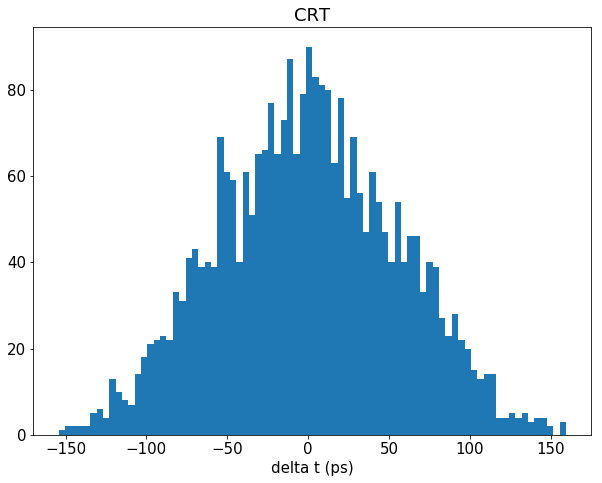

In [7]:
plt.rcParams["font.size"]      = 15
plt.rcParams["figure.figsize"] = 10, 7.5

plt.hist(a_time_diff, bins=80)
#plt.xlim(-200, 200)
plt.title('CRT')
plt.xlabel('delta t (ps)')
plt.show()

In [ ]:
python ctr_ring_no_true_info.py 0 1 6 0 
/data5/users/carmenromo/PETALO/PETit/PETit-ring/ring_dataframes_analysis/ring_dataframes_files/ 
petit_ring_tof_all_tables 
/data5/users/carmenromo/PETALO/PETit/PETit-ring/ring_dataframes_analysis/ 
data_ctr irad165mm_depth3cm

### Adding the exponential distribution:

In [3]:
eventsPath = '/data5/users/carmenromo/PETALO/PETit/PETit-ring/ring_dataframes_analysis/data_ctr/ctr_exp_dist_tof/'

timestamp_thr = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
time_diff = [[] for j in range(len(timestamp_thr))]
event_ids = [[] for j in range(len(timestamp_thr))]

for filename in os.listdir(eventsPath):
    if filename.endswith('.npz'):
        my_file = eventsPath+filename        
        d = np.load(my_file)
        for j in range(len(timestamp_thr)):
            time_diff[j] = np.concatenate((time_diff[j], d['time_diff'][j]))
            #pos_cart1[j] = np.concatenate((pos_cart1[j], d['pos_cart1'][j]))
            #pos_cart2[j] = np.concatenate((pos_cart2[j], d['pos_cart2'][j]))
            event_ids[j] = np.concatenate((event_ids[j], d['event_ids'][j]))
            
a_time_diff = np.array(time_diff)
a_event_ids = np.array(event_ids)

In [4]:
len(a_time_diff[0])
a_time_diff.shape
a_event_ids

array([[700051., 700052., 700097., ..., 964649., 964746., 964782.],
       [700051., 700052., 700097., ..., 964649., 964746., 964782.],
       [700051., 700052., 700097., ..., 964649., 964746., 964782.],
       [700051., 700052., 700097., ..., 964649., 964746., 964782.],
       [700051., 700052., 700097., ..., 964649., 964746., 964782.]])

In [5]:
len(a_time_diff[0]==a_time_diff[4])

2714

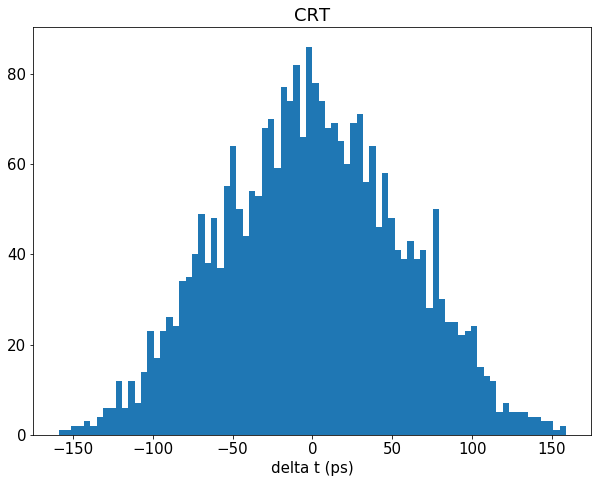

In [6]:
plt.rcParams["font.size"]      = 15
plt.rcParams["figure.figsize"] = 10, 7.5

plt.hist(a_time_diff[0], bins=80)
#plt.xlim(-200, 200)
plt.title('CRT')
plt.xlabel('delta t (ps)')
plt.show()

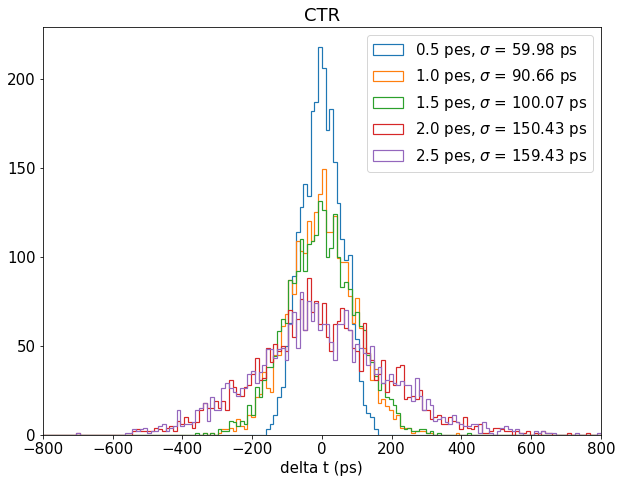

In [7]:
plt.rcParams["font.size"]      = 15
plt.rcParams["figure.figsize"] = 10, 7.5
plot_range = (-800, 800)
sigmas = [59.98, 90.66, 100.07, 150.43, 159.43]
bins = np.histogram(np.hstack((a_time_diff[0], a_time_diff[1], a_time_diff[2], a_time_diff[3], a_time_diff[4])), 
                    bins=150, range=plot_range)[1]
for j, (thr, s) in enumerate(zip(timestamp_thr, sigmas)):
    plt.hist(a_time_diff[j], bins=bins, histtype='step', linewidth=1.2, label=f'{thr} pes, $\sigma$ = {s} ps')
plt.title('CTR')
plt.xlabel('delta t (ps)')
plt.xlim(plot_range)
plt.legend()
plt.show()

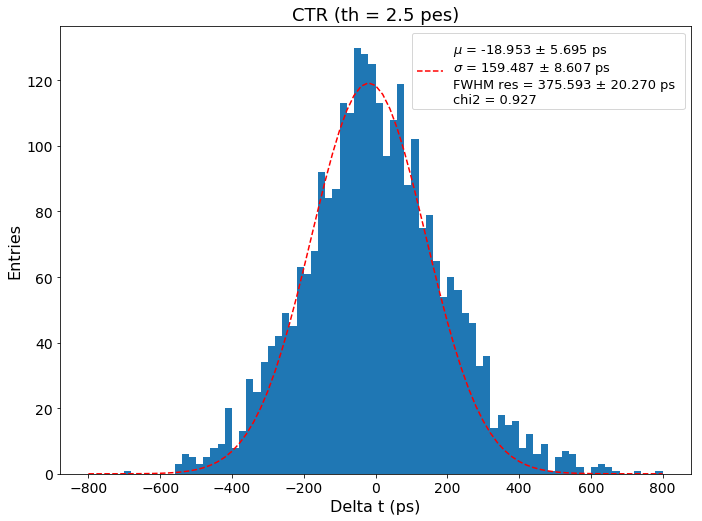

In [30]:
y, x, _   = plt.hist(a_time_diff[4], 80, (-800, 800))

mu, sigma = norm.fit(a_time_diff[4])
f         = fitf.fit(fitf.gauss, x[:-1], y, (200, mu, sigma), fit_range=(-200, 200), sigma=np.sqrt(y))
fwhm      = 2.35482 * (np.sqrt(np.var(a_time_diff[4])))

mu2        = f.values[1]
mu2_err    = f.errors[1]
sigma2     = f.values[2]
sigma2_err = f.errors[2]
fwhm2      = sigma2      * 2.355
fwhm2_err  = sigma2_err  * 2.355
chi2       = f.chi2

plt.plot(x, fitf.gauss(x, *f.values[ :3]), "r--", 
         label='$\mu$ = %.3f ± %.3f ps \n$\sigma$ = %.3f ± %.3f ps \nFWHM res = %.3f ± %.3f ps \nchi2 = %.3f'% 
         (mu2, mu2_err, sigma2, sigma2_err, fwhm2, fwhm2_err, chi2))
plt.title (f"CTR (th = 2.5 pes)", fontsize=18)
plt.ylabel('Entries', fontsize=16)
plt.xlabel('Delta t (ps)', fontsize=16)
plt.tick_params(labelsize=14)
plt.legend(fontsize=13, loc=1)

plt.tight_layout()

In [68]:
from antea.io.mc_io import load_mcTOFsns_response
from antea.io.mc_io import load_configuration

path      = '/data5/users/carmenromo/PETALO/PETit/PETit-ring/ring_dataframes_analysis/ring_dataframes_files/'
file_name = path+'petit_ring_tof_all_tables.010.pet.h5'
tof_wave  = load_mcTOFsns_response(file_name)
conf = load_configuration(file_name)



In [79]:
tof_wave.head(1500)

,event_id,sensor_id,time_bin,charge
0,200000,-4260,138,1
1,200000,-4260,169,1
2,200000,-4260,171,1
3,200000,-4260,193,1
4,200000,-4260,202,1
5,200000,-4260,247,1
6,200000,-4260,276,1
7,200000,-4260,339,1
8,200000,-4260,351,1
9,200000,-4260,411,1
